# Closer Challenge - Definition


Segment clients for better markting campaigns

# Imports

## Libraries

In [1]:
## Utility and Data Wrangling
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

## Plotting and Viz
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import scipy.stats as stats

## Dataset

In [2]:
dataset = pd.read_excel('../data/dataset.xlsx')

In [3]:
dfInsurance = dataset.copy()

# Dataset Global Information

## Data structure

Tamanho (\#rows): 10296   
\# Colunas: 14
Duplicados (Alto nível): 0

## Statistics by column

| Column                              | Missing Values | Mean/Top    | St.dev      |
|-------------------------------------|----------------|-------------|-------------|
| Customer Identity                   | 0              | 5148.500000 | 2972.343520 |
| First Policy´s Year                 | 30             | 1991.062634 | 511.267913  |
| Customer Age                        | 17             | 47.992217   | 19.709476   |
| Educational Degree                  | 17             | 3 - BSc/MSc | -           |
| Gross Monthly Salary                | 36             | 5012.838557 | 2314.900605 |
| Geographic Living Area              | 1              | 2.709859    | 1.266291    |
| Has Children (Y=1)                  | 21             | 0.706764    | 0.455268    |
| Customer Monetary Value             | 0              | 177.892604  | 1945.811545 |
| Claims Rate                         | 0              | 0.742785    | 2.916957    |
| Premiums in LOB: Motor              | 34             | 300.470252  | 211.914997  |
| Premiums in LOB: Household          | 0              | 210.431192  | 352.595984  |
| Premiums in LOB: Health             | 43             | 171.580833  | 296.405976  |
| Premiums in LOB: Life               | 104            | 41.855782   | 47.480632   |
| Premiums in LOB: Work Compensations | 86             | 41.277514   | 51.513572   |

# Mapping column names

| Original Column                     | Changed column     |
|-------------------------------------|--------------------|
| Customer Identity                   | cod_cust_id        |
| First Policy´s Year                 | dt_fpy             |
| Customer Age                        | atr_cust_age       |
| Educational Degree                  | dsc_edu_deg        |
| Gross Monthly Salary                | amt_gms            |
| Geographic Living Area              | atr_gla            |
| Has Children (Y=1)                  | flg_children       |
| Customer Monetary Value             | amt_cmv            |
| Claims Rate                         | rt_cr              |
| Premiums in LOB: Motor              | amt_lob_motor      |
| Premiums in LOB: Household          | amt_plob_household |
| Premiums in LOB: Health             | amt_plob_health    |
| Premiums in LOB: Life               | amt_plob_life      |
| Premiums in LOB: Work Compensations | amt_plob_wcomp     |

In [4]:
columns_map = {"Customer Identity":"cod_cust_id",
                "First Policy´s Year": "dt_fpy",
                "Customer Age": "atr_cust_age",
                "Educational Degree":"dsc_edu_deg",
                "Gross Monthly Salary": "amt_gms",
                "Geographic Living Area": "atr_gla",
                "Has Children (Y=1)":"flg_children",
                "Customer Monetary Value":"amt_cmv",
                "Claims Rate":"rt_cr",
                "Premiums in LOB: Motor":"amt_plob_motor",
                "Premiums in LOB: Household":"amt_plob_household",
                "Premiums in LOB: Health":"amt_plob_health",
                "Premiums in LOB:  Life":"amt_plob_life",
                "Premiums in LOB: Work Compensations":"amt_plob_wcomp"}

columns_map_reverse = {v: k for k, v in columns_map.items()}

dfInsurance = dfInsurance.rename(columns=columns_map)

dfInsurance.head(1)

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
0,1,1985.0,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89


In [5]:
columns_map_reverse

{'cod_cust_id': 'Customer Identity',
 'dt_fpy': 'First Policy´s Year',
 'atr_cust_age': 'Customer Age',
 'dsc_edu_deg': 'Educational Degree',
 'amt_gms': 'Gross Monthly Salary',
 'atr_gla': 'Geographic Living Area',
 'flg_children': 'Has Children (Y=1)',
 'amt_cmv': 'Customer Monetary Value',
 'rt_cr': 'Claims Rate',
 'amt_plob_motor': 'Premiums in LOB: Motor',
 'amt_plob_household': 'Premiums in LOB: Household',
 'amt_plob_health': 'Premiums in LOB: Health',
 'amt_plob_life': 'Premiums in LOB:  Life',
 'amt_plob_wcomp': 'Premiums in LOB: Work Compensations'}

# Questions

## Project Roadmap
* What can we ask the data to get insights.
* What can we do with the data to introduce ML techniques
---

* Pass graphs to 

* Do people with children and without children are different? (Different Distributions, Premiums, etc.)
* Are there differences between people who live in different areas? (e.g. A zone has higher criminality rates wich translate in premiums on household and higher claim rates?)
* Are there differences between people who earn more (maybe group by low, medium and high classes)
* Are there differences between more educated and less educated people? (ex. people with higher education have higher claim rates)


Clientes com + de 1 LOB |--> CMV por \# LOB's | Educational Degrees   
First Policy´s Year CORR Customer Monetary Value || Customer Monetary Value CORR Claims Rate

## Feature Engineering

- [X] Replace null values on premiums with 0 ( df.fillna(0) ) - if there is a null in any premium column, Total Premium and its respective rate returns NaN
- [X] KNN Imputation
----
- [X] (atr_edu_deg) Educational Degree to int -- Make the feature an integer to be ingested posteriorly in analysis and ML
- [X] (amt_premium_total) Premium LOB's Total -- Total of LOB's premium can be a rich feature
- [X] (atr_fpy_to_date) First Policy´s Year To Date -- Difference between first policy year to reference year (1999 (max year + 1))
- [X] (rt_plob_x_to_total) % of LOB X Premium to total -- Weight of LOB X to total premium of the customer
- [X] (fe_bin_plob_x_to_total) FE Bining Premium LOB X to Total Premium -- Binning for Premium to the total of premium of the customer (Pseudo-Supervised)
    - https://towardsdatascience.com/essential-guide-to-perform-feature-binning-using-a-decision-tree-model-90bcc66d61f9
    - Maybe adds value in profiling the customer by defining the weight of that LOB to the other LOBS.
    - [X] Minmax scale the classes
    - [ ] Instead of Total premium as target, use the Customer Monetary Value -- IMPORTANT 
- [X] (fe_cmv_cr_quadrant_Type{1,2} Break into classes the dispersion of Customer Monetary Value VS Claims Rate
- [X] Apply FeatureTools to data - Outcome: No good results
- [ ] (nome_da_var) nome da variavel descritivo -- Introdução/descrição da variavel 
- [X] (offset_age_fpy) Age - FPY - Age of the client when he started making business with the company
- [X] (log_var) Logarithm of features - Transformations
- [X] (minmax_var) Minmax scaler of features - Transformations
- [X] (yearly_salary) Salary of customer * 12 - The value of the yearly salary of the client
- [X] (effort_rate) Total Premium / Yearly Salary - The total cost of the premiums in the client budget.
- [X] (claims_cost) Claims Ratio * Total Premium - Actual cost of the of the claims the client activated

In [6]:
## Mapping of engineered features
## TODO
columns_map['Premium Total'] = 'amt_premium_total'
columns_map_reverse['amt_premium_total'] = 'Premium Total'

columns_map['Educational Degree (Int)'] = 'atr_edu_deg'
columns_map_reverse['atr_edu_deg'] = 'Educational Degree (Int)'

columns_map['First Policy´s Year To Year: 1999'] = 'atr_fpy_to_date'
columns_map_reverse['atr_fpy_to_date'] = 'First Policy´s Year To Year: 1999'

## Data Constraints 

* Some clients have negative (below 0) premiums, why? (possible association with CMV?)
* 

## Data Cohesion

* Uma data está com o valor 53784.00
* Um customer tem a idate de 988.00
* Um CMV com o valor -165680.424 e CR de 250 e picos | Conclusão: Remover cliente   
^ 3 observações. Decisão: Remover estas observações
* 3 pares de rows que contêm duplicados caso nao seja excluida a coluna do customer id

## Description of the data

In [7]:
# Overview
dfInsurance.head()

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
0,1,1985.0,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,21.0,2 - High School,1353.0,4.0,1.0,-131.13,1.116503,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,46.0,1 - Basic,4554.0,3.0,0.0,504.67,0.284810,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,35.0,3 - BSc/MSc,2197.0,4.0,1.0,-16.99,0.986665,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,43.0,3 - BSc/MSc,3526.0,4.0,1.0,35.23,0.904281,338.62,47.80,182.59,18.78,41.45


In [8]:
# Shape dos dados
dfInsurance.shape

(10296, 14)

In [9]:
# Info dos tipos de objecto por coluna
dfInsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cust_id         10296 non-null  int64  
 1   dt_fpy              10266 non-null  float64
 2   atr_cust_age        10279 non-null  float64
 3   dsc_edu_deg         10279 non-null  object 
 4   amt_gms             10260 non-null  float64
 5   atr_gla             10295 non-null  float64
 6   flg_children        10275 non-null  float64
 7   amt_cmv             10296 non-null  float64
 8   rt_cr               10296 non-null  float64
 9   amt_plob_motor      10262 non-null  float64
 10  amt_plob_household  10296 non-null  float64
 11  amt_plob_health     10253 non-null  float64
 12  amt_plob_life       10192 non-null  float64
 13  amt_plob_wcomp      10210 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [10]:
# Valores nulos das colunas
dfInsurance.isna().sum()

cod_cust_id             0
dt_fpy                 30
atr_cust_age           17
dsc_edu_deg            17
amt_gms                36
atr_gla                 1
flg_children           21
amt_cmv                 0
rt_cr                   0
amt_plob_motor         34
amt_plob_household      0
amt_plob_health        43
amt_plob_life         104
amt_plob_wcomp         86
dtype: int64

### Missing values distribution

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

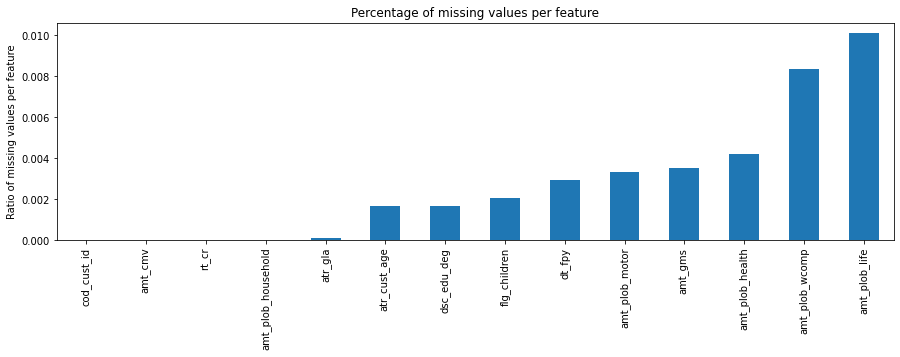

In [11]:
dfInsurance.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

In [12]:
# Estatísticas Colunas (1)
dfInsurance.describe().T

,count,mean,std,min,25%,50%,75%,max
cod_cust_id,10296.0,5148.500000,2972.343520,1.000,2574.750000,5148.500000,7722.250000,10296.00
dt_fpy,10266.0,1991.062634,511.267913,1974.000,1980.000000,1986.000000,1992.000000,53784.00
atr_cust_age,10279.0,47.992217,19.709476,15.000,33.000000,48.000000,63.000000,988.00
amt_gms,10260.0,5012.838557,2314.900605,665.000,3411.000000,5002.500000,6580.250000,110429.76
atr_gla,10295.0,2.709859,1.266291,1.000,1.000000,3.000000,4.000000,4.00
flg_children,10275.0,0.706764,0.455268,0.000,0.000000,1.000000,1.000000,1.00
amt_cmv,10296.0,177.892604,1945.811545,-165680.424,-9.440000,186.870000,399.777500,11875.89
rt_cr,10296.0,0.742785,2.916957,0.000,0.392437,0.720657,0.976811,256.20
amt_plob_motor,10262.0,300.470252,211.914997,-4.110,190.590000,298.610000,408.300000,11604.42
amt_plob_household,10296.0,210.431192,352.595984,-75.000,49.450000,132.800000,290.050000,25048.80


In [13]:
# Estatísticas Colunas (1)
dfInsurance.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cod_cust_id,10296.0,NaN,NaN,NaN,5148.5,2972.34352,1.0,2574.75,5148.5,7722.25,10296.0
dt_fpy,10266.0,NaN,NaN,NaN,1991.062634,511.267913,1974.0,1980.0,1986.0,1992.0,53784.0
atr_cust_age,10279.0,NaN,NaN,NaN,47.992217,19.709476,15.0,33.0,48.0,63.0,988.0
dsc_edu_deg,10279,4,3 - BSc/MSc,4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_gms,10260.0,NaN,NaN,NaN,5012.838557,2314.900605,665.0,3411.0,5002.5,6580.25,110429.76
atr_gla,10295.0,NaN,NaN,NaN,2.709859,1.266291,1.0,1.0,3.0,4.0,4.0
flg_children,10275.0,NaN,NaN,NaN,0.706764,0.455268,0.0,0.0,1.0,1.0,1.0
amt_cmv,10296.0,NaN,NaN,NaN,177.892604,1945.811545,-165680.424,-9.44,186.87,399.7775,11875.89
rt_cr,10296.0,NaN,NaN,NaN,0.742785,2.916957,0.0,0.392437,0.720657,0.976811,256.2
amt_plob_motor,10262.0,NaN,NaN,NaN,300.470252,211.914997,-4.11,190.59,298.61,408.3,11604.42


### Check for duplicates across all rows besides customer ID

By checking for duplicate rows across all columns there are none, however if we remove the customer ID column then there are three pairs of rows with exactly the same values, only differing in the customer ID. Decision: remove them

In [14]:
# Duplicados a alto nível
dfInsurance.duplicated(subset=dfInsurance.columns.difference(['cod_cust_id'])).sum() #without id column


3

In [15]:
dfInsurance[dfInsurance.duplicated(subset=dfInsurance.columns.difference(['cod_cust_id']), keep=False)]


,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
2075,2076,1977.0,42.0,2 - High School,4407.0,4.0,1.0,-22.11,0.995568,214.93,88.90,266.94,39.23,42.12
2099,2100,1987.0,29.0,2 - High School,3824.0,4.0,1.0,290.61,0.579074,202.37,177.25,306.39,63.90,-0.11
3506,3507,1986.0,64.0,2 - High School,7800.0,4.0,0.0,-119.35,1.096030,163.03,481.75,224.82,94.35,18.56
8013,8014,1987.0,29.0,2 - High School,3824.0,4.0,1.0,290.61,0.579074,202.37,177.25,306.39,63.90,-0.11
8121,8122,1977.0,42.0,2 - High School,4407.0,4.0,1.0,-22.11,0.995568,214.93,88.90,266.94,39.23,42.12
9553,9554,1986.0,64.0,2 - High School,7800.0,4.0,0.0,-119.35,1.096030,163.03,481.75,224.82,94.35,18.56


##### Remove duplicates

In [16]:
#Drops duplicates except for the first occurrence
dfInsurance = dfInsurance.drop_duplicates(subset=dfInsurance.columns.difference(['cod_cust_id']))

dfInsurance.duplicated(subset=dfInsurance.columns.difference(['cod_cust_id'])).sum()

0

### Premium LOB's - Missing data

Missings:  
Premiums in LOB: Motor                  13 (34 total)   
Premiums in LOB: Household               0   
Premiums in LOB: Health                 14 (43 total)   
Premiums in LOB:  Life                 104   
Premiums in LOB: Work Compensations     12 (86 total)  

In [17]:
LOB_LIFE_NULLS = dfInsurance.loc[dfInsurance['amt_plob_life'].isnull()]

In [18]:
LOB_LIFE_NULLS.isnull().sum()

cod_cust_id             0
dt_fpy                  0
atr_cust_age            0
dsc_edu_deg             0
amt_gms                 1
atr_gla                 0
flg_children            0
amt_cmv                 0
rt_cr                   0
amt_plob_motor         13
amt_plob_household      0
amt_plob_health        14
amt_plob_life         104
amt_plob_wcomp         12
dtype: int64

In [19]:
LOB_LIFE_NULLS.describe()

,cod_cust_id,dt_fpy,atr_cust_age,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
count,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000,91.000000,104.000000,90.000000,0.0,92.000000
mean,5155.615385,1985.961538,49.923077,5157.067961,2.548077,0.730769,165.425000,0.599319,410.724505,73.636538,128.888667,NaN,23.457174
std,2823.759603,7.037932,13.915621,1577.002544,1.229727,0.445708,253.744105,0.423286,123.952698,145.871322,78.684998,NaN,38.680801
min,69.000000,1974.000000,19.000000,2028.000000,1.000000,0.000000,-187.000000,0.000000,35.340000,-75.000000,15.670000,NaN,-12.000000
25%,2927.750000,1980.000000,38.000000,3827.000000,1.000000,0.000000,-25.302500,0.147406,334.730000,0.000000,61.010000,NaN,3.862500
50%,5088.500000,1986.000000,51.500000,5102.000000,3.000000,1.000000,18.675000,0.693134,434.080000,38.900000,119.300000,NaN,12.445000
75%,7281.250000,1992.000000,60.250000,6385.500000,4.000000,1.000000,411.867500,1.000526,510.430000,93.625000,197.177500,NaN,27.560000
max,10143.000000,1998.000000,79.000000,8970.000000,4.000000,1.000000,1000.750000,1.312139,562.440000,1015.750000,338.730000,NaN,313.950000


### Outliers - CMV & Claims Rate & Custumer Age & FPY

In [20]:
OUT_CMV = dfInsurance.loc[dfInsurance['amt_cmv'] < -160000]

In [21]:
OUT_CMV

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
171,172,1990.0,27.0,3 - BSc/MSc,2172.0,4.0,1.0,-165680.424,256.2,378.07,78.9,166.81,6.89,18.45


In [22]:
OUT_CustAge = dfInsurance.loc[dfInsurance['atr_cust_age'] > 100]
OUT_CustAge
# 2 Alternativas: Remover ou Trocar pela média/mediana de idades.

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
7195,7196,1993.0,988.0,3 - BSc/MSc,5659.0,4.0,0.0,146.02,0.773855,428.97,192.8,108.91,1.89,23.67


In [23]:
OUT_FPY = dfInsurance.loc[dfInsurance['dt_fpy'] > 2022]
OUT_FPY
# 2 Alternativas: Remover ou Trocar pela média/mediana de idades.

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
9294,9295,53784.0,68.0,3 - BSc/MSc,6535.0,1.0,0.0,348.85,0.370623,351.4,15.0,187.37,22.45,17.78


# Filters

## Impossible values 

We found at least two datapoints that have no conceptual sense.   
One where the first policuy year is FAR into the future, and another where the customer age is simply impossible.  
The first we filtered to no data above 2022, the second for no customer age above 100 years of age.

In [24]:
dfInsurance_old = dfInsurance.copy()

In [25]:
dfInsurance = dfInsurance.loc[~((dfInsurance['dt_fpy'] > 2022) | 
                        (dfInsurance['atr_cust_age'] > 100))]

In [26]:
dfInsurance

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
0,1,1985.0,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,21.0,2 - High School,1353.0,4.0,1.0,-131.13,1.116503,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,46.0,1 - Basic,4554.0,3.0,0.0,504.67,0.284810,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,35.0,3 - BSc/MSc,2197.0,4.0,1.0,-16.99,0.986665,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,43.0,3 - BSc/MSc,3526.0,4.0,1.0,35.23,0.904281,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292,1984.0,67.0,4 - PhD,6375.0,2.0,0.0,-0.11,0.961204,393.74,49.45,173.81,9.78,14.78
10292,10293,1977.0,64.0,1 - Basic,4862.0,3.0,0.0,1405.60,0.000000,133.58,1035.75,143.25,12.89,105.13
10293,10294,1994.0,40.0,3 - BSc/MSc,5835.0,1.0,1.0,524.10,0.211335,403.63,132.80,142.25,12.67,4.89
10294,10295,1981.0,39.0,1 - Basic,3941.0,2.0,1.0,250.05,0.645060,188.59,211.15,198.37,63.90,112.91


## Outliers 

[!] To verify CMV and CR outliers

In [27]:
def interquartile_range(column):
    """Checks if data is 1.5 times the interquartile range greater than the third quartile (Q3) 
    or 1.5 times the interquartile range less than the first quartile (Q1)
    
    param column: a series or column from a dataset containing numerical data 
    output: returns the superior and inferior values where observations are below or above 1.5 times the interquartile range 
    """
    distance = 1.5 * (np.nanpercentile(column, 75) - np.nanpercentile(column, 25))
    lim_sup= distance + np.nanpercentile(column, 90)
    lim_inf= np.nanpercentile(column, 10) - distance
    
    return lim_sup, lim_inf


We will create a new column called outlier_candidate to mark all the values that are above or lower the interquartile ranges limits

In [28]:
dfInsurance['outlier_candidate'] = ''
for column in dfInsurance.columns[1:-2]:
    if column not in('cod_cust_id', 'dt_fpy', 'atr_cust_age', 'dsc_edu_deg', 'atr_gla', 'flg_children'):
        
        lim_sup, lim_inf = interquartile_range(dfInsurance[column])

        dfInsurance['outlier_candidate'] = np.where((dfInsurance[column] > lim_sup) | (dfInsurance[column] < lim_inf), dfInsurance['outlier_candidate'].astype(str) +'%' + column, dfInsurance['outlier_candidate'])

dfInsurance['outlier_candidate'] = dfInsurance['outlier_candidate'].apply(lambda x: x.lstrip('%'))
dfInsurance['outlier_candidate'].unique()

array(['', 'amt_plob_life', 'amt_cmv%rt_cr',
       'amt_plob_household%amt_plob_life', 'amt_plob_household',
       'amt_cmv', 'amt_cmv%amt_plob_household', 'amt_plob_health',
       'amt_cmv%amt_plob_household%amt_plob_life', 'amt_plob_motor',
       'amt_plob_motor%amt_plob_health',
       'amt_cmv%amt_plob_motor%amt_plob_health', 'amt_gms',
       'amt_cmv%amt_plob_motor', 'amt_cmv%amt_plob_health', 'rt_cr'],
      dtype=object)

In [29]:
dfInsurance['outlier_candidate'].value_counts()

                                            9789
amt_plob_life                                239
amt_plob_household                           167
amt_cmv%amt_plob_household                    37
amt_plob_household%amt_plob_life              22
amt_cmv%rt_cr                                 14
amt_cmv%amt_plob_household%amt_plob_life       5
amt_cmv                                        4
amt_plob_health                                4
amt_plob_motor                                 2
amt_gms                                        2
amt_cmv%amt_plob_motor                         2
amt_plob_motor%amt_plob_health                 1
amt_cmv%amt_plob_motor%amt_plob_health         1
amt_cmv%amt_plob_health                        1
rt_cr                                          1
Name: outlier_candidate, dtype: int64

### Cut Dataset + Calculate Premium Totals

In [30]:
# Total de premiums (LOBs)
dfInsurance['amt_premium_total'] = (dfInsurance['amt_plob_life'] + dfInsurance['amt_plob_household'] + dfInsurance['amt_plob_motor'] + 
                                    dfInsurance['amt_plob_health']+ dfInsurance['amt_plob_wcomp'])

dfInsurance['DATA_MAIN_CUT'] = np.where(((dfInsurance['dt_fpy'] > 2022) | 
                        (dfInsurance['atr_cust_age'] > 100) | 
                        (dfInsurance['amt_cmv'] < -160000) |
                        (dfInsurance['amt_gms']> 15000) |
                        (dfInsurance['rt_cr'] > 2) |
                        (dfInsurance['amt_plob_motor'] > 2000)|
                        (dfInsurance['amt_plob_household'] > 5000)|
                        (dfInsurance['amt_plob_health'] > 5000)|
                        (dfInsurance['amt_plob_wcomp'] > 500)|
                        (dfInsurance['amt_premium_total'] > 5000)), 'THROW','KEEP')

# Transformations & Feature Engineering

## Fill null values
[!] Apenas foram preenchidos os valores nulos para as colunas com os premiums

In [31]:
dfInsurance.isnull().sum()

cod_cust_id             0
dt_fpy                 30
atr_cust_age           17
dsc_edu_deg            17
amt_gms                36
atr_gla                 1
flg_children           21
amt_cmv                 0
rt_cr                   0
amt_plob_motor         34
amt_plob_household      0
amt_plob_health        43
amt_plob_life         104
amt_plob_wcomp         86
outlier_candidate       0
amt_premium_total     225
DATA_MAIN_CUT           0
dtype: int64

In [32]:
#In case we opt to fill null values with 0
#dfInsurance.loc[:, 'amt_plob_motor':'amt_plob_wcomp'] = dfInsurance.loc[:, 'amt_plob_motor':'amt_plob_wcomp'].fillna(value = 0)

### Using KNNImputer to fill missing values

In [33]:
dfInsurance.reset_index(inplace=True, drop = True)

X = dfInsurance.loc[:, ~dfInsurance.columns.isin(['cod_cust_id', 'dsc_edu_deg', 'flg_children', 'outlier_candidate', 'DATA_MAIN_CUT'])]

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

imputer_column_names = ['dt_fpy', 'atr_cust_age', 'amt_gms', 'atr_gla', 'amt_cmv', 'rt_cr', 'amt_plob_motor', 'amt_plob_household', 'amt_plob_health', 'amt_plob_life', 'amt_plob_wcomp', 'atr_edu_deg']

dfX = pd.DataFrame(data=Xtrans, columns=imputer_column_names)
dfInsurance.update(dfX)


## Educational Degree to Integer
[!] Passar para int a nova coluna atr_edu_deg após ter sido definida a forma de substituição dos nulos

In [34]:
dfInsurance['atr_edu_deg'] = dfInsurance['dsc_edu_deg'].map(lambda x: str(x)[0])

In [35]:
dfInsurance['dsc_edu_deg'].unique()

array(['2 - High School', '1 - Basic', '3 - BSc/MSc', '4 - PhD', nan],
      dtype=object)

In [36]:
dfInsurance['atr_edu_deg'].unique()

array(['2', '1', '3', '4', 'n'], dtype=object)

In [37]:
# replace values 'n' from column atr_edu_deg for NaN
dfInsurance['atr_edu_deg'] = dfInsurance['atr_edu_deg'].replace('n', np.NaN)
#convert to numeric column atr_edu_deg
dfInsurance['atr_edu_deg'] = pd.to_numeric(dfInsurance['atr_edu_deg'])

## Premium LOB's - Total

In [38]:
# Total de premiums (LOBs)
dfInsurance['amt_premium_total'] = (dfInsurance['amt_plob_life'] + dfInsurance['amt_plob_household'] + dfInsurance['amt_plob_motor'] + 
                                    dfInsurance['amt_plob_health']+ dfInsurance['amt_plob_wcomp'])

## First Policy Year to Reference Year (1998)

In [39]:
# First Policy Year to Reference Year
dfInsurance['dt_fpy'] = dfInsurance['dt_fpy'].astype('int64')
dfInsurance['atr_fpy_to_date'] = pd.Series(1998 - dfInsurance['dt_fpy'], dtype="Int32")

In [40]:
dfInsurance['atr_fpy_to_date'].unique()

<IntegerArray>
[13, 17,  7,  8, 12, 19, 10, 22, 15, 21,  0, 24, 20,  3, 18, 14,  9, 11, 16,
  4,  5,  6,  1,  2, 23]
Length: 25, dtype: Int32

## Customer Yearly Salary

Gross Monthly Salary * 12 

In [41]:
dfInsurance['amt_gys'] = dfInsurance['amt_gms'] * 12

## Customer Claims Cost

Claims Ratio = (Claims / Premiums)

Claims = (Claims Ratio * Premiums)

In [42]:
dfInsurance['amt_claims_total'] = dfInsurance['rt_cr'] * dfInsurance['amt_premium_total']

## Customer Premiums And Claims Cost to Yearly and Monthly Salary 

Rate of Premium = (Total Premium / Gross Yearly Salary)
Rate of Claims = (Total Claim Cost / Gross Yearly Salary)

In [43]:
## Yearly
dfInsurance['rt_premiums_year'] = dfInsurance['amt_premium_total'] / dfInsurance['amt_gys']
dfInsurance['rt_claims_year'] = dfInsurance['amt_claims_total'] / dfInsurance['amt_gys']


## % of LOB X Premium to total

In [44]:
dfInsurance['rt_plob_life'] = (dfInsurance['amt_plob_life'] / dfInsurance['amt_premium_total'])
dfInsurance['rt_plob_household'] = (dfInsurance['amt_plob_household'] / dfInsurance['amt_premium_total'])
dfInsurance['rt_plob_motor'] = (dfInsurance['amt_plob_motor'] / dfInsurance['amt_premium_total'])
dfInsurance['rt_plob_health'] = (dfInsurance['amt_plob_health'] / dfInsurance['amt_premium_total'])
dfInsurance['rt_plob_wcomp'] = (dfInsurance['amt_plob_wcomp'] / dfInsurance['amt_premium_total'])

In [45]:
dfInsurance

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,atr_fpy_to_date,amt_gys,amt_claims_total,rt_premiums_year,rt_claims_year,rt_plob_life,rt_plob_household,rt_plob_motor,rt_plob_health,rt_plob_wcomp
0,1,1985,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.390032,375.85,...,13,52248.0,259.59,0.012738,0.004968,0.070632,0.119373,0.564712,0.219905,0.025377
1,2,1981,21.0,2 - High School,1353.0,4.0,1.0,-131.13,1.116503,77.46,...,17,16236.0,1017.09,0.056107,0.062644,0.213489,0.456881,0.085031,0.128096,0.116503
2,3,1991,46.0,1 - Basic,4554.0,3.0,0.0,504.67,0.284810,206.15,...,7,54648.0,210.93,0.013552,0.003860,0.116595,0.303133,0.278355,0.168215,0.133702
3,4,1990,35.0,3 - BSc/MSc,2197.0,4.0,1.0,-16.99,0.986665,182.48,...,8,26364.0,592.67,0.022784,0.022480,0.058833,0.072168,0.303789,0.518030,0.047180
4,5,1986,43.0,3 - BSc/MSc,3526.0,4.0,1.0,35.23,0.904281,338.62,...,12,42312.0,569.01,0.014871,0.013448,0.029846,0.075965,0.538141,0.290175,0.065873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,10292,1984,67.0,4 - PhD,6375.0,2.0,0.0,-0.11,0.961204,393.74,...,14,76500.0,616.67,0.008386,0.008061,0.015244,0.077078,0.613723,0.270918,0.023038
10287,10293,1977,64.0,1 - Basic,4862.0,3.0,0.0,1405.60,0.000000,133.58,...,21,58344.0,0.00,0.024520,0.000000,0.009010,0.723997,0.093373,0.100133,0.073487
10288,10294,1994,40.0,3 - BSc/MSc,5835.0,1.0,1.0,524.10,0.211335,403.63,...,4,70020.0,147.14,0.009943,0.002101,0.018198,0.190739,0.579728,0.204312,0.007023
10289,10295,1981,39.0,1 - Basic,3941.0,2.0,1.0,250.05,0.645060,188.59,...,17,47292.0,499.87,0.016386,0.010570,0.082460,0.272480,0.243367,0.255988,0.145705


## Binning LOB Premiums based on Total Premium

**To avoid data leakeage**, this step should be done after a train/test split. I will perform an ephemeral split here, just as a concept for the future

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

np.random.seed(42)
if "Set" not in dfInsurance.columns:
    dfInsurance["Set"] = np.random.choice(["train", "test"], p =[.7, .3], size=(dfInsurance.shape[0],))
    
dfInsuranceTrain = dfInsurance.loc[dfInsurance.Set == 'train']
dfInsuranceTest = dfInsurance.loc[dfInsurance.Set == 'test']

### LOB: Motor

In [47]:
params = {'max_depth':[1,2,3], 'min_samples_leaf':[10], 'criterion':['absolute_error','squared_error','poisson']}
lob_motor_reg = DecisionTreeRegressor(random_state=42)
lob_motor_reg_gs = GridSearchCV(lob_motor_reg, param_grid=params, scoring='r2')
lob_motor_reg_gs.fit(dfInsuranceTrain[['amt_plob_motor']], dfInsuranceTrain['amt_premium_total'])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [10]},
             scoring='r2')

In [48]:
lob_motor_reg_gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 10}

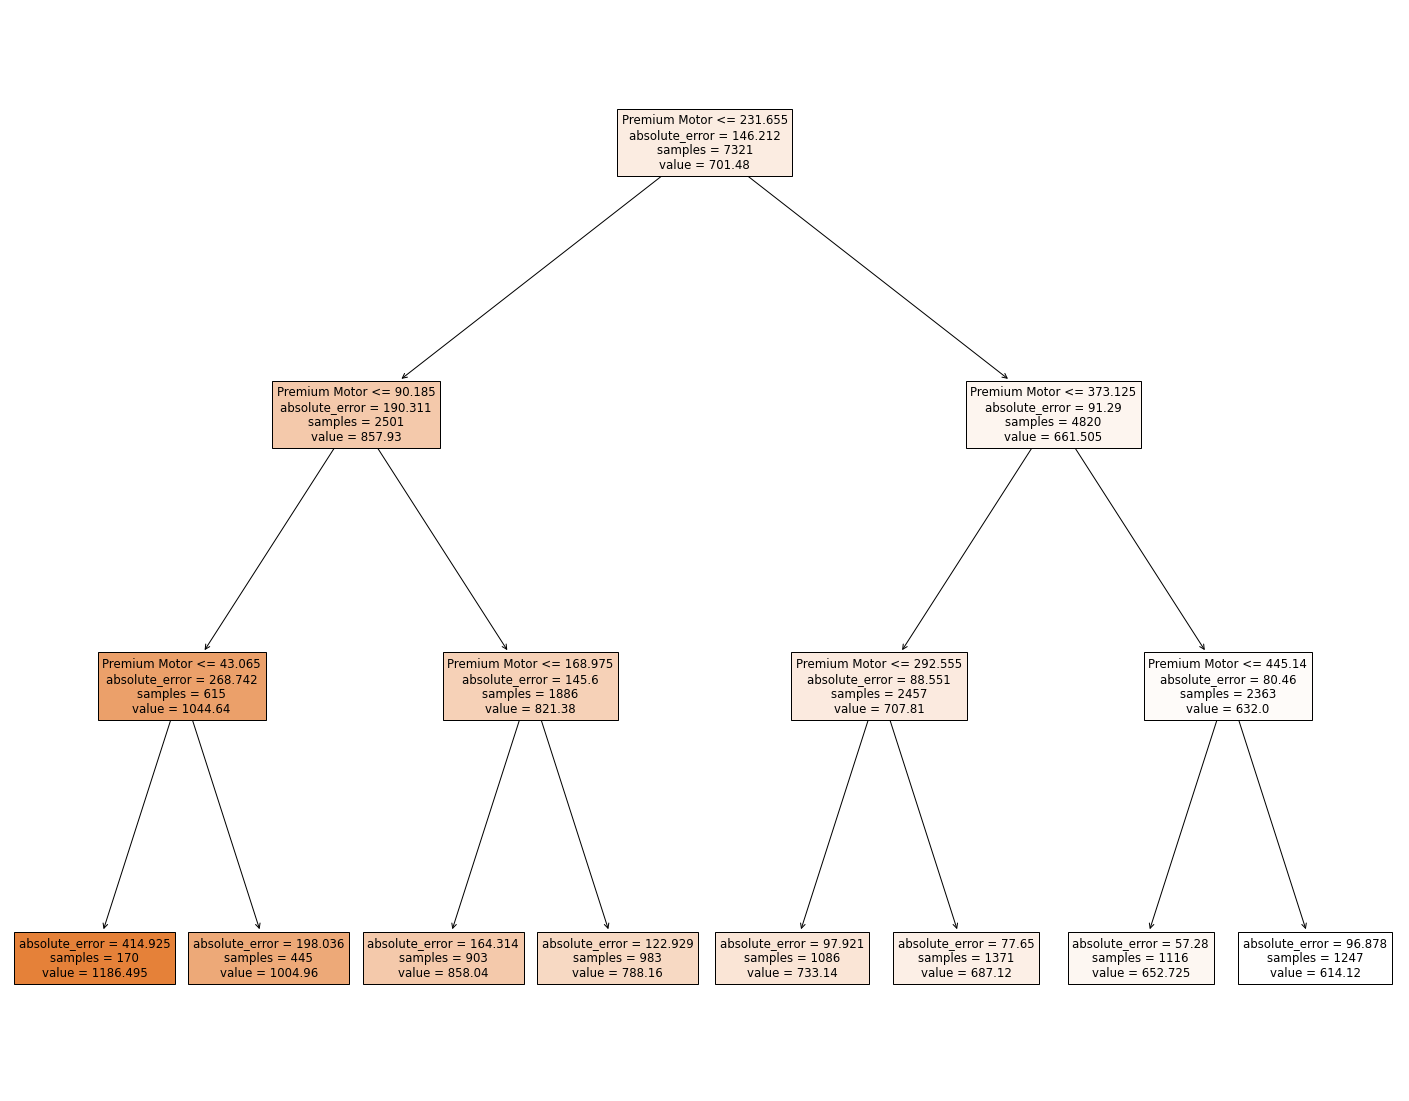

In [49]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lob_motor_reg_gs.best_estimator_, feature_names=['Premium Motor'], filled=True)

Cut where Absolute error < 100, or the maximum split.   
Motor Rules:
   * CLASS A: $P > €404 $
   * CLASS B: $€225 < P <= €404 $
   * CLASS C: $€168 < P <= €225$
   * CLASS D: $€90  < P <= €168$
   * CLASS E: $€2.40 < P <= €90 $
   * CLASS F: $P <= €2.40$
   
This and all other classes, should have, 6 Classes ideally, 8 maximum.  
[!] Why? Intuition.

In [50]:
# https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions
col = 'amt_plob_motor'
conditions_motor = [dfInsurance[col] > 404, 
              (dfInsurance[col] > 225) & (dfInsurance[col] <= 404), 
              (dfInsurance[col] > 168) & (dfInsurance[col] <= 225),
              (dfInsurance[col] > 90) & (dfInsurance[col] <= 168),
              (dfInsurance[col] > 2.40) & (dfInsurance[col] <= 90),
              (dfInsurance[col] > 0) & (dfInsurance[col] <= 2.40),
              (dfInsurance[col] == 0),
              (dfInsurance[col] < 0)]
choices = [ "A", 'B', 'C', 'D', 'E', 'F', 'ZEROS','NEGATIVES']
dfInsurance["fe_bin_plob_motor"] = np.select(conditions_motor, choices, default=np.nan)
choices = [6, 5, 4, 3, 2, 1, 0, -1]
dfInsurance["fe_int_plob_motor_b"] = np.select(conditions_motor, choices, default=np.nan)
dfInsurance["fe_int_plob_motor_a"] = dfInsurance["fe_int_plob_motor_b"]-1

g = dfInsurance.groupby(['DATA_MAIN_CUT', 'fe_bin_plob_motor'])['amt_plob_motor']
min_, max_ = g.transform('min'), g.transform('max')
dfInsurance['fe_amt_plob_motor' + '_scale'] = round((((dfInsurance["fe_int_plob_motor_b"]-dfInsurance["fe_int_plob_motor_a"])*(dfInsurance['amt_plob_motor'] - min_)) / 
                                                (max_ - min_)) + dfInsurance["fe_int_plob_motor_a"],5)
dfInsurance.drop(columns = ['fe_int_plob_motor_a', 'fe_int_plob_motor_b'], inplace=True)
dfInsurance['fe_amt_plob_motor' + '_scale'] = dfInsurance['fe_amt_plob_motor' + '_scale'].fillna(0)

### LOB: Life

In [51]:
params = {'max_depth':[1,2,3], 'min_samples_leaf':[10], 'criterion':['absolute_error','squared_error','poisson']}
lob_life_reg = DecisionTreeRegressor(random_state=42)
lob_life_reg_gs = GridSearchCV(lob_life_reg, param_grid=params, scoring='r2')
lob_life_reg_gs.fit(dfInsuranceTrain[['amt_plob_life']], dfInsuranceTrain['amt_premium_total'])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [10]},
             scoring='r2')

In [52]:
lob_life_reg_gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 10}

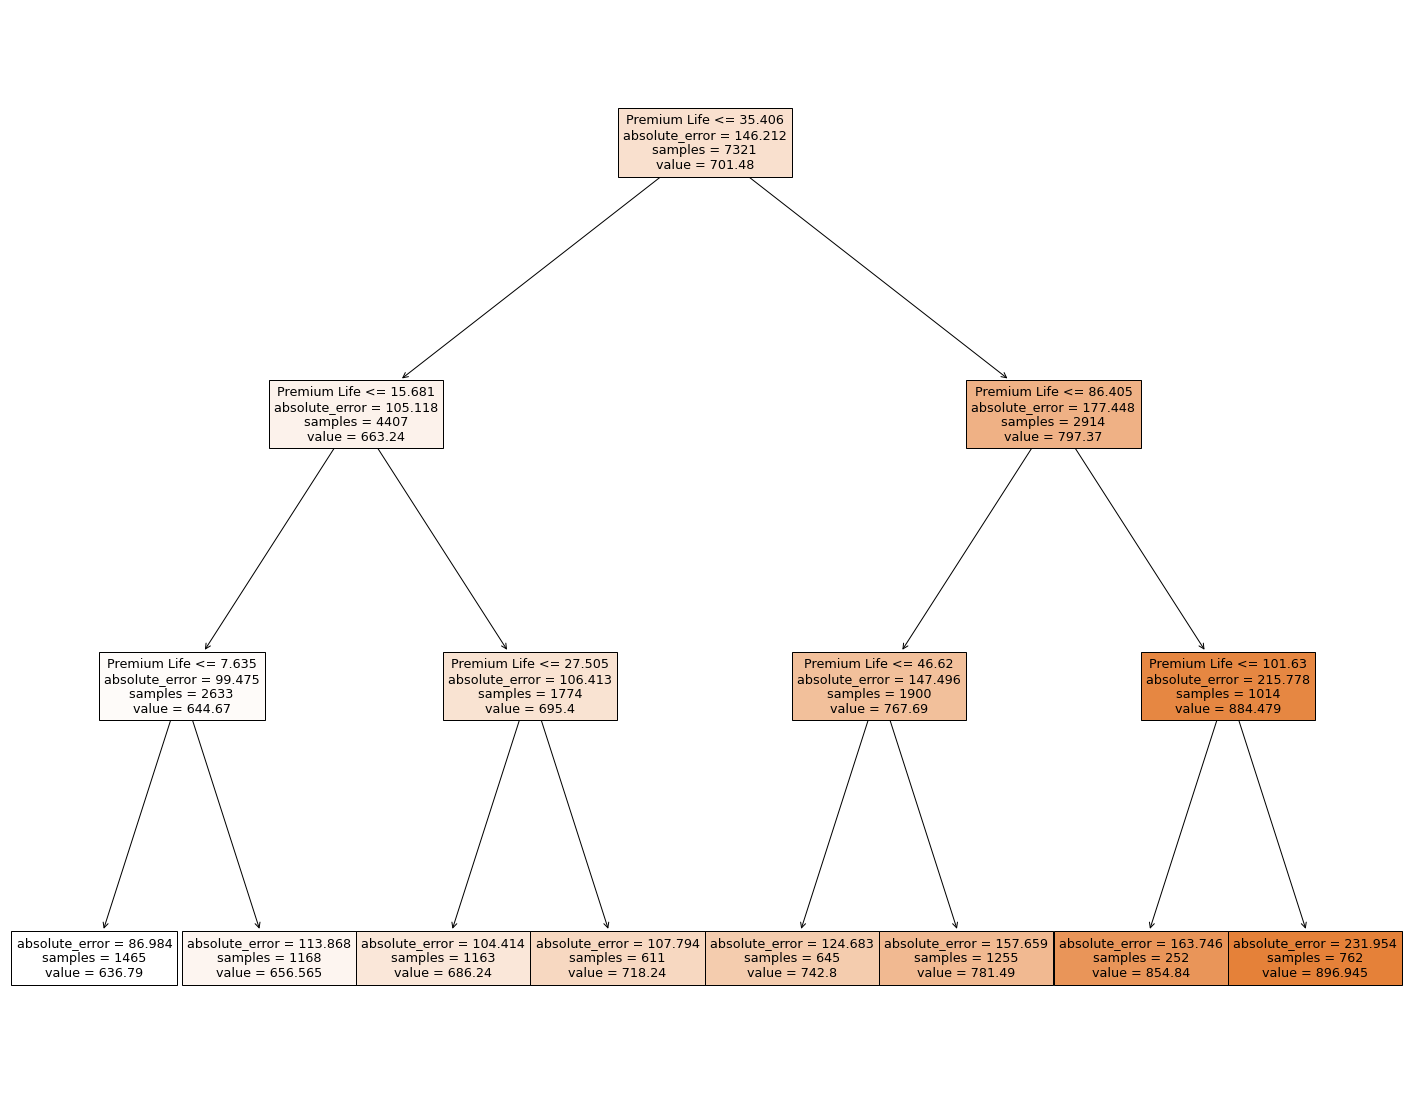

In [53]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lob_life_reg_gs.best_estimator_, feature_names=['Premium Life'], class_names=['Total Premium'], filled=True)

Cut where Absolute error < 100, or the maximum split.   
Life Rules:
   * CLASS A: $P > €131.5 $
   * CLASS B: $€86.4 < P <= €131.5$
   * CLASS C: $€58 < P <= €86.4$
   * CLASS D: $€35.84  < P <= €58$
   * CLASS E: $€26.5 < P <= €35.84$
   * CLASS F: $€14.2 < P <= €26.5$
   * CLASS G: $€7.4 < P <= €14.2$
   * CLASS H: $P <= €7.4$

In [54]:
col = 'amt_plob_life'
conditions_life = [dfInsurance[col] > 131.5, 
              (dfInsurance[col] > 86.4) & (dfInsurance[col] <= 131.5), 
              (dfInsurance[col] > 58) & (dfInsurance[col] <= 86.4),
              (dfInsurance[col] > 35.84) & (dfInsurance[col] <= 58),
              (dfInsurance[col] > 26.5) & (dfInsurance[col] <= 35.84),
              (dfInsurance[col] > 14.2) & (dfInsurance[col] <= 26.5),
              (dfInsurance[col] > 7.4) & (dfInsurance[col] <= 14.2),
              (dfInsurance[col] > 0) & (dfInsurance[col] <= 7.4),
              (dfInsurance[col] == 0),
              (dfInsurance[col] < 0)]
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'ZEROS','NEGATIVES']
dfInsurance["fe_bin_plob_life"] = np.select(conditions_life, choices, default=np.nan)

choices = [8,7,6, 5, 4, 3, 2, 1, 0, -1]
dfInsurance["fe_int_plob_life_b"] = np.select(conditions_life, choices, default=np.nan)
dfInsurance["fe_int_plob_life_a"] = dfInsurance["fe_int_plob_life_b"]-1

g = dfInsurance.groupby(['DATA_MAIN_CUT', 'fe_bin_plob_life'])['amt_plob_life']
min_, max_ = g.transform('min'), g.transform('max')
dfInsurance['fe_amt_plob_life' + '_scale'] = round((((dfInsurance["fe_int_plob_life_b"]-dfInsurance["fe_int_plob_life_a"])*(dfInsurance['amt_plob_life'] - min_)) / 
                                                (max_ - min_)) + dfInsurance["fe_int_plob_life_a"],5)
dfInsurance.drop(columns = ['fe_int_plob_life_a', 'fe_int_plob_life_b'], inplace=True)
dfInsurance['fe_amt_plob_life' + '_scale'] = dfInsurance['fe_amt_plob_life' + '_scale'].fillna(0)

### LOB: Health

In [55]:
params = {'max_depth':[1,2,3], 'min_samples_leaf':[10], 'criterion':['absolute_error','squared_error','poisson']}
lob_health_reg = DecisionTreeRegressor(random_state=42)
lob_health_reg_gs = GridSearchCV(lob_health_reg, param_grid=params, scoring='r2')
lob_health_reg_gs.fit(dfInsuranceTrain[['amt_plob_health']], dfInsuranceTrain['amt_premium_total'])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [10]},
             scoring='r2')

In [56]:
lob_health_reg_gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 2, 'min_samples_leaf': 10}

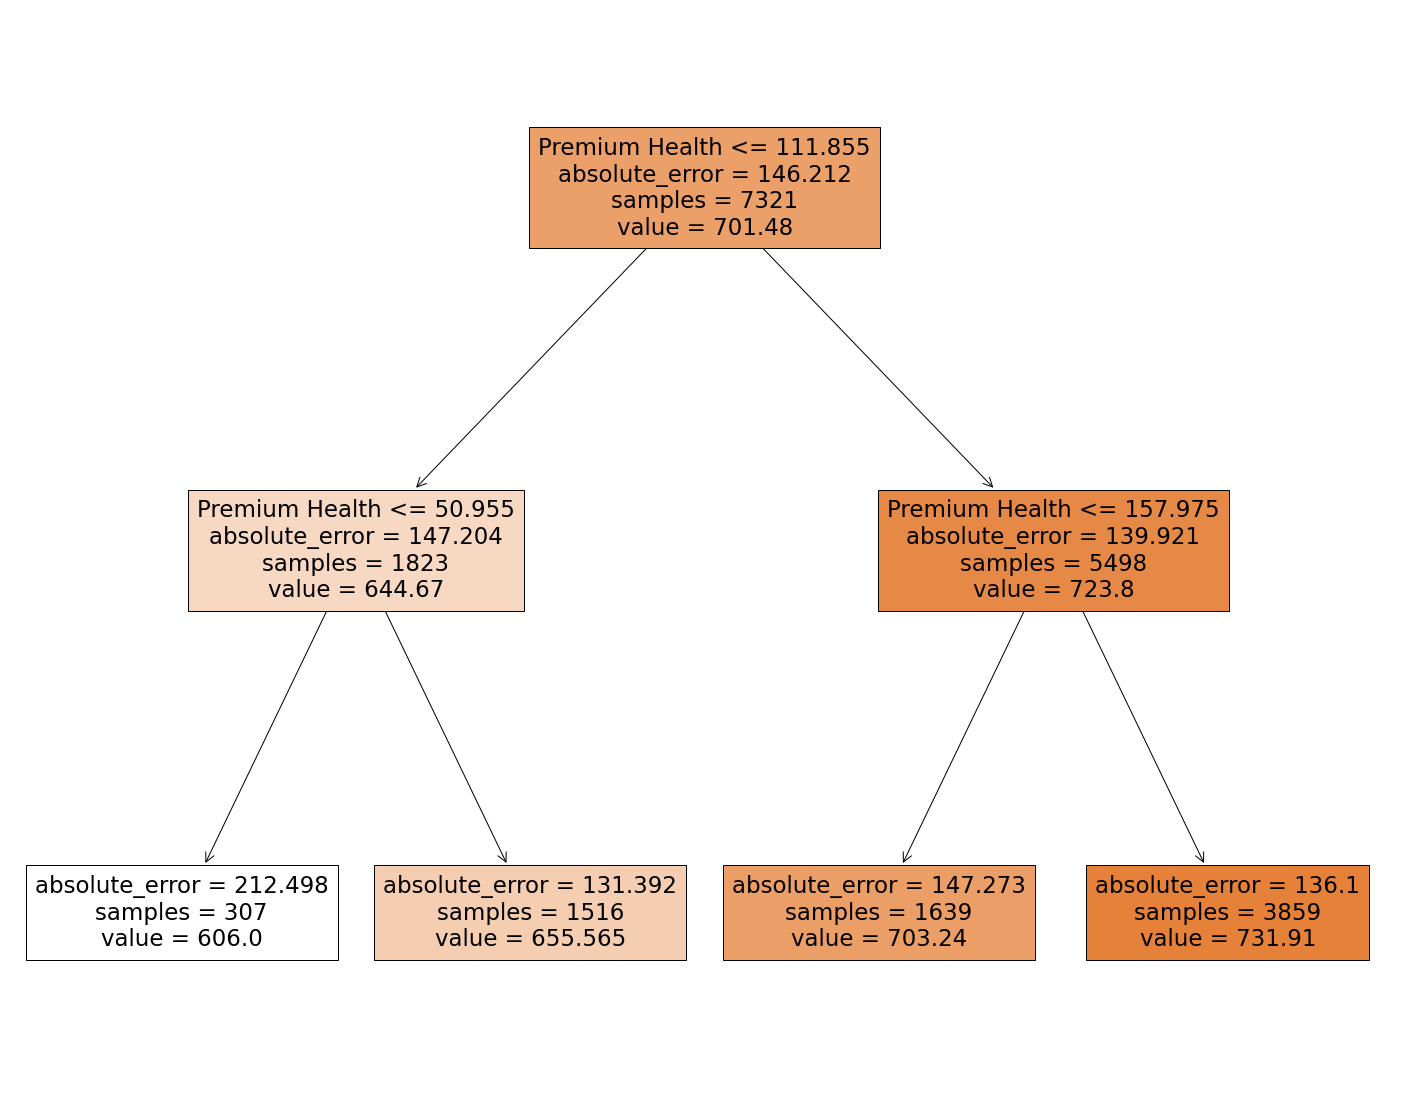

In [57]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lob_health_reg_gs.best_estimator_, feature_names=['Premium Health'], class_names=['Total Premium'], filled=True)

It's possible to see that the Health Premium is harder to bin, based on the absolute error values.  
[!] Insight

Due to the insight above, it doesn't make sense to divide this hard to bin class into 8 classes, when 4 do the trick.  
Health Rules:
   * CLASS A: $P > €156 $
   * CLASS B: $€95.3 < P <= €156$
   * CLASS C: $€47.2 < P <= €95.3$
   * CLASS D: $P <= €47.2$

In [58]:
col = 'amt_plob_health'
conditions_health = [dfInsurance[col] > 156, 
              (dfInsurance[col] > 95.3) & (dfInsurance[col] <= 156), 
              (dfInsurance[col] > 47.2) & (dfInsurance[col] <= 95.3),
              (dfInsurance[col] > 0) & (dfInsurance[col] <= 47.2),
              (dfInsurance[col] == 0),
              (dfInsurance[col] < 0)]
choices = ['A', 'B', 'C', 'D', 'ZEROS','NEGATIVES']
dfInsurance["fe_bin_plob_health"] = np.select(conditions_health, choices, default=np.nan)

choices = [4, 3, 2, 1, 0, -1]
dfInsurance["fe_int_plob_health_b"] = np.select(conditions_health, choices, default=np.nan)
dfInsurance["fe_int_plob_health_a"] = dfInsurance["fe_int_plob_health_b"]-1

g = dfInsurance.groupby(['DATA_MAIN_CUT', 'fe_bin_plob_health'])['amt_plob_health']
min_, max_ = g.transform('min'), g.transform('max')
dfInsurance['fe_amt_plob_health' + '_scale'] = round((((dfInsurance["fe_int_plob_health_b"]-dfInsurance["fe_int_plob_health_a"])*(dfInsurance['amt_plob_health'] - min_)) / 
                                                (max_ - min_)) + dfInsurance["fe_int_plob_health_a"],5)
dfInsurance.drop(columns = ['fe_int_plob_health_a', 'fe_int_plob_health_b'], inplace=True)
dfInsurance['fe_amt_plob_health' + '_scale'] = dfInsurance['fe_amt_plob_health' + '_scale'].fillna(0)

### LOB: Work Compensation

In [59]:
params = {'max_depth':[1,2,3], 'min_samples_leaf':[10], 'criterion':['absolute_error','squared_error','poisson']}
lob_wcomp_reg = DecisionTreeRegressor(random_state=42)
lob_wcomp_reg_gs = GridSearchCV(lob_wcomp_reg, param_grid=params, scoring='r2')
lob_wcomp_reg_gs.fit(dfInsuranceTrain[['amt_plob_wcomp']], dfInsuranceTrain['amt_premium_total'])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [10]},
             scoring='r2')

In [60]:
lob_wcomp_reg_gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 10}

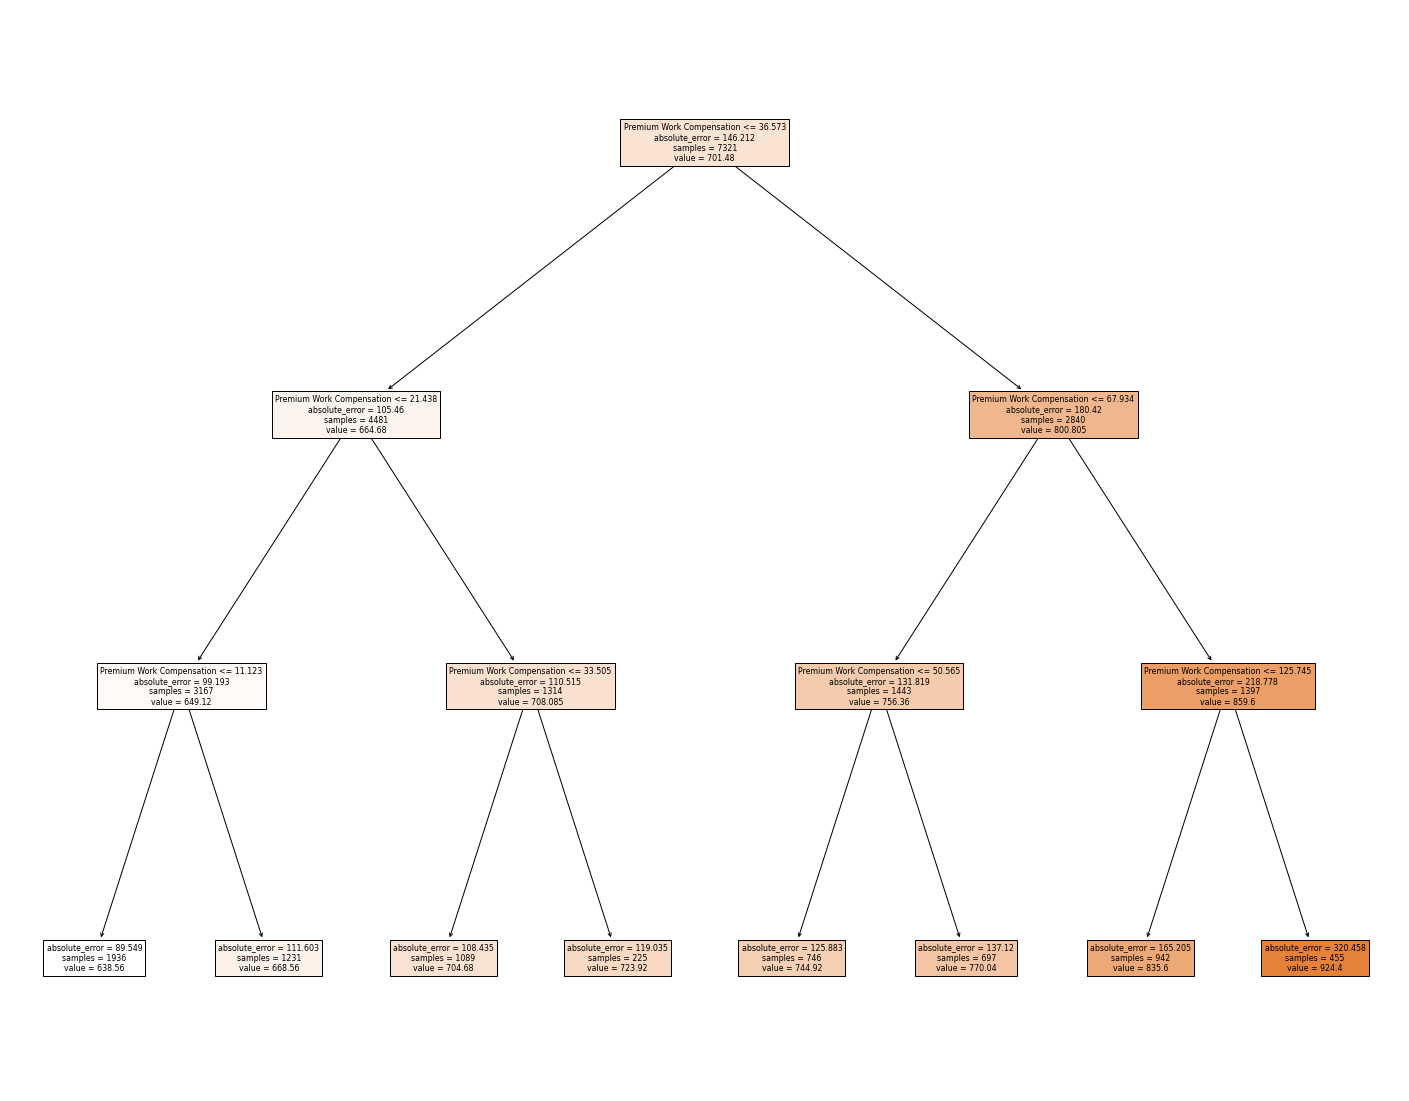

In [61]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lob_wcomp_reg_gs.best_estimator_, feature_names=['Premium Work Compensation'], class_names=['Total Premium'], filled=True)

In this case, it does make sense to partition in the lower Premiums, but in the "higher" premiums, it's unecessary partitioning.

Due to the insight above, it doesn't make sense to divide this hard to bin class into 8 classes, when 4 do the trick.  
Health Rules:
   * CLASS A: $P > €69 $
   * CLASS B: $€44.68 < P <= €69$
   * CLASS C: $€22.11 < P <= €44.68$
   * CLASS D: $€6.33 < P <= €22.11$
   * CLASS E: $P <= €6.33$

In [62]:
col = 'amt_plob_wcomp'
conditions_wcomp = [dfInsurance[col] > 69, 
              (dfInsurance[col] > 44.68) & (dfInsurance[col] <= 69), 
              (dfInsurance[col] > 22.11) & (dfInsurance[col] <= 44.68),
              (dfInsurance[col] > 6.33) & (dfInsurance[col] <= 22.11),
              (dfInsurance[col] > 0) & (dfInsurance[col] <= 6.33),
              (dfInsurance[col] == 0),
              (dfInsurance[col] < 0)]

choices = ['A', 'B', 'C', 'D', 'E', 'ZEROS','NEGATIVES']
dfInsurance["fe_bin_plob_wcomp"] = np.select(conditions_wcomp, choices, default=np.nan)

choices = [5, 4, 3, 2, 1, 0, -1]
dfInsurance["fe_int_plob_wcomp_b"] = np.select(conditions_wcomp, choices, default=np.nan)
dfInsurance["fe_int_plob_wcomp_a"] = dfInsurance["fe_int_plob_wcomp_b"]-1

g = dfInsurance.groupby(['DATA_MAIN_CUT', 'fe_bin_plob_wcomp'])['amt_plob_wcomp']
min_, max_ = g.transform('min'), g.transform('max')
dfInsurance['fe_amt_plob_wcomp' + '_scale'] = round((((dfInsurance["fe_int_plob_wcomp_b"]-dfInsurance["fe_int_plob_wcomp_a"])*(dfInsurance['amt_plob_wcomp'] - min_)) / 
                                                (max_ - min_)) + dfInsurance["fe_int_plob_wcomp_a"],5)
dfInsurance.drop(columns = ['fe_int_plob_wcomp_a', 'fe_int_plob_wcomp_b'], inplace=True)
dfInsurance['fe_amt_plob_wcomp' + '_scale'] = dfInsurance['fe_amt_plob_wcomp' + '_scale'].fillna(0)

### LOB: Household

In [63]:
params = {'max_depth':[1,2,3], 'min_samples_leaf':[10], 'criterion':['absolute_error','squared_error','poisson']}
lob_household_reg = DecisionTreeRegressor(random_state=42)
lob_household_reg_gs = GridSearchCV(lob_household_reg, param_grid=params, scoring='r2')
lob_household_reg_gs.fit(dfInsuranceTrain[['amt_plob_household']], dfInsuranceTrain['amt_premium_total'])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [10]},
             scoring='r2')

In [64]:
lob_household_reg_gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 10}

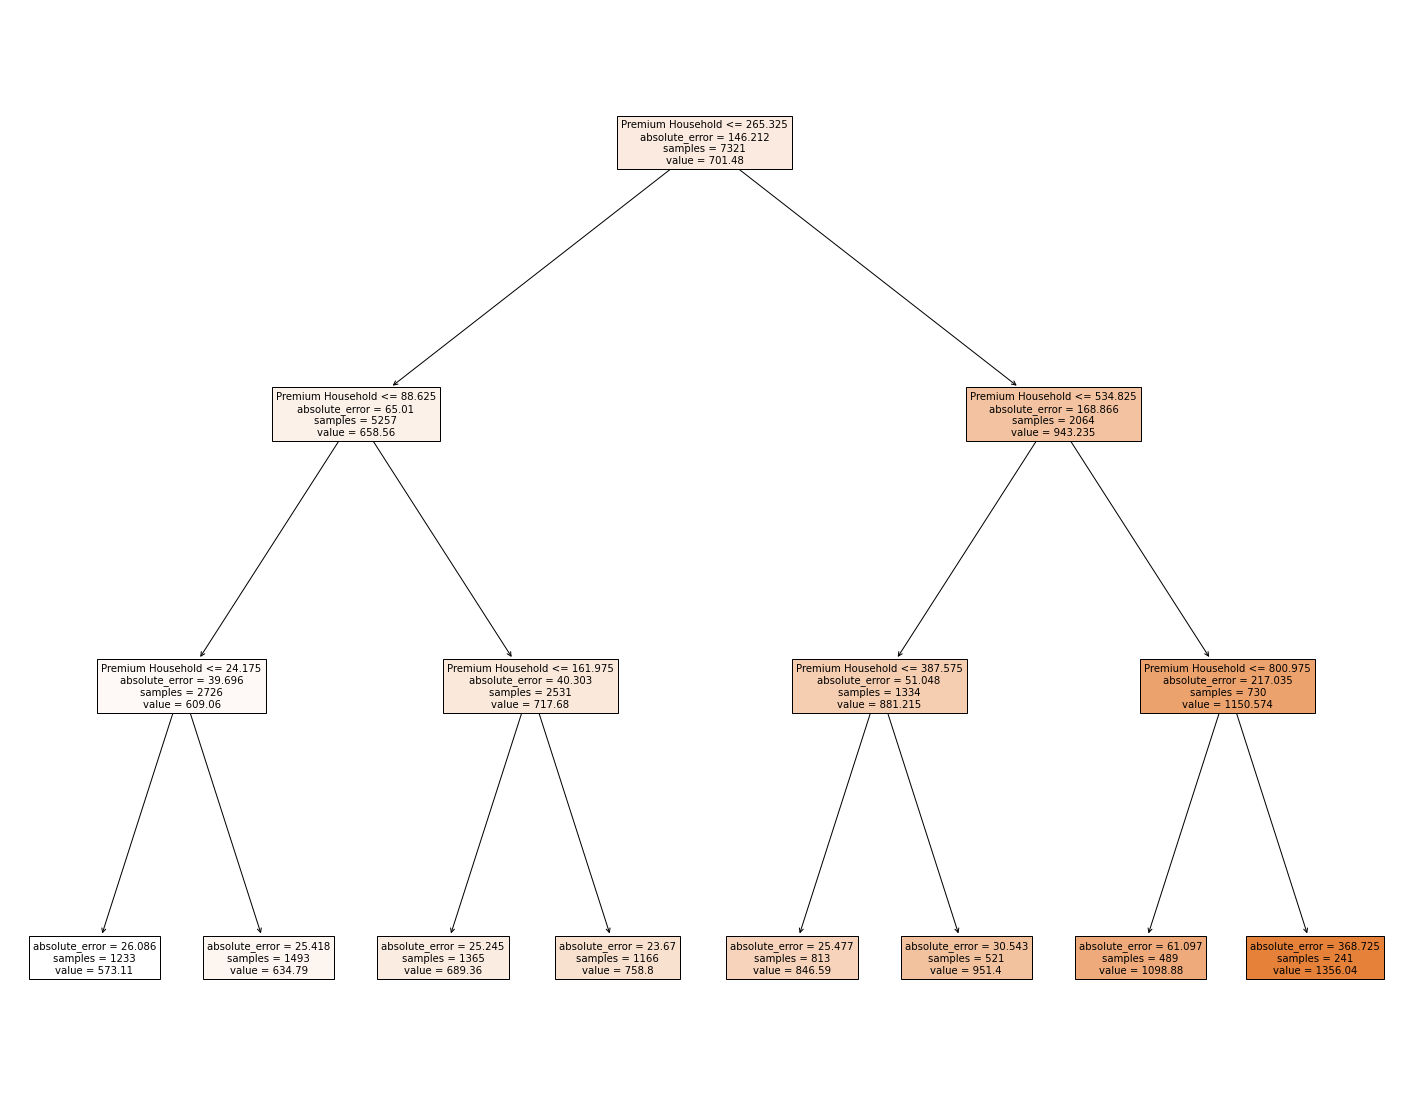

In [65]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lob_household_reg_gs.best_estimator_, feature_names=['Premium Household'], class_names=['Total Premium'], filled=True)


Household Rules:
   * CLASS A: $P > €529.8 $
   * CLASS B: $€368.1 < P <= €529.8$
   * CLASS C: $€255.3 < P <= €368.1$
   * CLASS D: $€157.5 < P <= €255.3$
   * CLASS E: $€88.6 < P <= €157.5$
   * CLASS F: $€19.2 < P <= 88.6$
   * CLASS G: $€19.2 < P$

In [66]:
col = 'amt_plob_household'
conditions_household = [dfInsurance[col] > 529.8, 
              (dfInsurance[col] > 368.1) & (dfInsurance[col] <= 529.8), 
              (dfInsurance[col] > 255.3) & (dfInsurance[col] <= 368.1),
              (dfInsurance[col] > 157.5) & (dfInsurance[col] <= 255.3),
              (dfInsurance[col] > 88.6) & (dfInsurance[col] <= 157.5),
              (dfInsurance[col] > 19.2) & (dfInsurance[col] <= 88.6),
              (dfInsurance[col] > 0) & (dfInsurance[col] <= 19.2),
              (dfInsurance[col] == 0),
              (dfInsurance[col] < 0)]

choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'ZEROS','NEGATIVES']
dfInsurance["fe_bin_plob_household"] = np.select(conditions_household, choices, default=np.nan)

choices = [7, 6, 5, 4, 3, 2, 1, 0, -1]
dfInsurance["fe_int_plob_household_b"] = np.select(conditions_household, choices, default=np.nan)
dfInsurance["fe_int_plob_household_a"] = dfInsurance["fe_int_plob_household_b"]-1

g = dfInsurance.groupby(['DATA_MAIN_CUT', 'fe_bin_plob_household'])['amt_plob_household']
min_, max_ = g.transform('min'), g.transform('max')
dfInsurance['fe_amt_plob_household' + '_scale'] = round((((dfInsurance["fe_int_plob_household_b"]-dfInsurance["fe_int_plob_household_a"])*(dfInsurance['amt_plob_household'] - min_)) / 
                                                (max_ - min_)) + dfInsurance["fe_int_plob_household_a"],5)
dfInsurance.drop(columns = ['fe_int_plob_household_a', 'fe_int_plob_household_b'], inplace=True)
dfInsurance['fe_amt_plob_household' + '_scale'] = dfInsurance['fe_amt_plob_household' + '_scale'].fillna(0)

### Crosstab to check results

É preciso explorar isto um bocado para ver se há insights

In [67]:
pd.crosstab(index=dfInsurance['fe_bin_plob_household'], columns=dfInsurance['fe_bin_plob_life'])

fe_bin_plob_life,A,B,C,D,E,F,G,H,NEGATIVES
fe_bin_plob_household,,,,,,,,,
A,216,224,176,134,65,94,56,41,16
B,103,148,166,164,69,72,58,31,17
C,79,144,218,261,114,140,83,53,37
D,83,100,214,350,220,284,162,117,53
E,49,83,128,286,239,428,277,248,102
F,45,73,120,200,200,448,444,522,237
G,5,16,32,40,22,100,90,93,45
NEGATIVES,21,24,47,81,66,159,256,288,155
ZEROS,1,5,4,5,3,17,10,9,6


## Customer Monetary Value And Claims Rate: Quadrant Breaker

In [68]:
m_slope = -525.5
rt_cut = 1
b_base = 500
conditions = [(dfInsurance['rt_cr'] >= rt_cut) & (dfInsurance['amt_cmv'] > ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q1
              (dfInsurance['rt_cr'] >= rt_cut) & (dfInsurance['amt_cmv'] <= ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q4
              (dfInsurance['rt_cr'] < rt_cut) & (dfInsurance['amt_cmv'] > ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q2
              (dfInsurance['rt_cr'] < rt_cut) & (dfInsurance['amt_cmv'] <= ((m_slope)*dfInsurance['rt_cr']+b_base))] # Q3
choices = ['Q1', 'Q4', 'Q2', 'Q3']

dfInsurance["fe_cmv_cr_quadrant_Type1"] = np.select(conditions, choices, default=np.nan)


m_slope = -970
rt_cut = 0.6
b_base = 1050
conditions = [(dfInsurance['rt_cr'] >= rt_cut) & (dfInsurance['amt_cmv'] > ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q1
              (dfInsurance['rt_cr'] >= rt_cut) & (dfInsurance['amt_cmv'] <= ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q4
              (dfInsurance['rt_cr'] < rt_cut) & (dfInsurance['amt_cmv'] > ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q2
              (dfInsurance['rt_cr'] < rt_cut) & (dfInsurance['amt_cmv'] <= ((m_slope)*dfInsurance['rt_cr']+b_base))] # Q3
choices = ['Q1', 'Q4', 'Q2', 'Q3']

dfInsurance["fe_cmv_cr_quadrant_Type2"] = np.select(conditions, choices, default=np.nan)

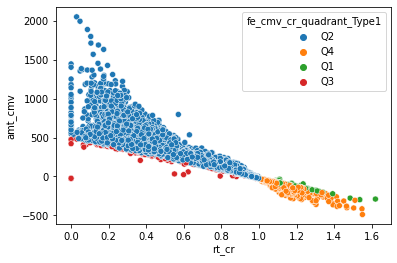

In [71]:
sns.scatterplot(data=dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP'], x='rt_cr', y = 'amt_cmv', hue = 'fe_cmv_cr_quadrant_Type1')
plt.show()

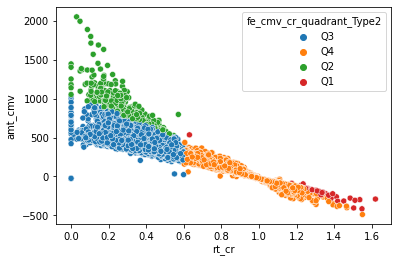

In [72]:
sns.scatterplot(data=dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP'], x='rt_cr', y = 'amt_cmv', hue = 'fe_cmv_cr_quadrant_Type2')
plt.show()

## Date offset

Current Age = Customer Age + (Reference Year - First Policy Year)

In [ ]:
dfInsurance['atr_current_age'] = dfInsurance['atr_cust_age'] + dfInsurance['atr_fpy_to_date']
dfInsurance['atr_current_age'] = dfInsurance['atr_current_age'].astype('int64')

## Logarithm Features

Logged features: 
* LOB Premium: Life
* LOB Premium: Household
* LOB Premium: Work Compensation
* LOB: Total
* LOB Rate: Life
* LOB Rate: Household
* LOB Rate: Motor
* LOB Rate: Health
* LOB Rate: Work Compensation

In [73]:
dfInsurance['log_amt_plob_life'] = np.where(min(dfInsurance['amt_plob_life']) <= 0,
np.log(dfInsurance['amt_plob_life'] + abs(min(dfInsurance['amt_plob_life'])) + 1),
np.log(abs(dfInsurance['amt_plob_life'])))

dfInsurance['log_amt_plob_household'] = np.where(min(dfInsurance['amt_plob_household']) <= 0,
np.log(dfInsurance['amt_plob_household'] + abs(min(dfInsurance['amt_plob_household'])) + 1),
np.log(abs(dfInsurance['amt_plob_household'])))

dfInsurance['log_amt_plob_wcomp'] = np.where(min(dfInsurance['amt_plob_wcomp']) <= 0,
np.log(dfInsurance['amt_plob_wcomp'] + abs(min(dfInsurance['amt_plob_wcomp'])) + 1),
np.log(abs(dfInsurance['amt_plob_wcomp'])))

dfInsurance['log_amt_premium_total'] = np.where(min(dfInsurance['amt_premium_total']) <= 0,
np.log(dfInsurance['amt_premium_total'] + abs(min(dfInsurance['amt_premium_total'])) + 1),
np.log(abs(dfInsurance['amt_premium_total'])))

dfInsurance['log_rt_plob_life'] = np.where(min(dfInsurance['rt_plob_life']) <= 0,
np.log(dfInsurance['rt_plob_life'] + abs(min(dfInsurance['rt_plob_life'])) + 1),
np.log(abs(dfInsurance['rt_plob_life'])))

dfInsurance['log_rt_plob_household'] = np.where(min(dfInsurance['rt_plob_household']) <= 0,
np.log(dfInsurance['rt_plob_household'] + abs(min(dfInsurance['rt_plob_household'])) + 1),
np.log(abs(dfInsurance['rt_plob_household'])))

dfInsurance['log_rt_plob_motor'] = np.where(min(dfInsurance['rt_plob_motor']) <= 0,
np.log(dfInsurance['rt_plob_motor'] + abs(min(dfInsurance['rt_plob_motor'])) + 1),
np.log(abs(dfInsurance['rt_plob_motor'])))

dfInsurance['log_rt_plob_health'] = np.where(min(dfInsurance['rt_plob_health']) <= 0,
np.log(dfInsurance['rt_plob_health'] + abs(min(dfInsurance['rt_plob_health'])) + 1),
np.log(abs(dfInsurance['rt_plob_health'])))

dfInsurance['log_rt_plob_wcomp'] = np.where(min(dfInsurance['rt_plob_wcomp']) <= 0,
np.log(dfInsurance['rt_plob_wcomp'] + abs(min(dfInsurance['rt_plob_wcomp'])) + 1),
np.log(abs(dfInsurance['rt_plob_wcomp'])))

C:\.conda\envs\CloserChallenge\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\.conda\envs\CloserChallenge\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## MinMax scale features

Scaled features:
* LOB Premium: Health
* LOB Premium: Motor
* Gross Monthly Salary
* Customer Age
* First Policy Year
* First Policy Year to reference year

In [ ]:
scaler = MinMaxScaler()
dfInsurance['minmax_amt_plob_health'] = scaler.fit_transform(dfInsurance[['amt_plob_health']])
dfInsurance['minmax_amt_plob_motor'] = scaler.fit_transform(dfInsurance[['amt_plob_motor']])
dfInsurance['minmax_amt_gms'] = scaler.fit_transform(dfInsurance[['amt_gms']])
dfInsurance['minmax_atr_cust_age'] = scaler.fit_transform(dfInsurance[['atr_cust_age']])
dfInsurance['minmax_dt_fpy'] = scaler.fit_transform(dfInsurance[['dt_fpy']])
dfInsurance['minmax_fpy_to_date'] = scaler.fit_transform(dfInsurance[['atr_fpy_to_date']])

## Square Root Features

Rooted features:
* Customer Monetary Value

In [ ]:
dfInsurance['sqrt_amt_cmv'] = np.where(min(dfInsurance['amt_cmv']) <= 0,
np.sqrt(dfInsurance['amt_cmv'] + abs(min(dfInsurance['amt_cmv'])) + 1),
np.sqrt(dfInsurance['amt_cmv']))

## Principal Component Analysis

## FeatureTools - Discontinued

In [ ]:
import featuretools as ft

# Make an entityset and add the entity
es = ft.EntitySet(id = 'insurance')
es.add_dataframe(dataframe = dfInsuranceA, dataframe_name = 'insuranceData',
                         make_index = True, index = 'index')


In [ ]:
# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_dataframe_name = 'insuranceData',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'])

feature_matrix.head()

## Partition of Dataset in Normal (A) and Extreme/Outlier Values (B) - Discontinued

In [ ]:
dfInsuranceA = dfInsurance.loc[~((dfInsurance['dt_fpy'] > 2022) | 
                        (dfInsurance['atr_cust_age'] > 100) | 
                        (dfInsurance['amt_cmv'] < -160000) |
                        (dfInsurance['amt_gms']> 15000) |
                        (dfInsurance['rt_cr'] > 2) |
                        (dfInsurance['amt_plob_motor'] > 2000)|
                        (dfInsurance['amt_plob_household'] > 5000)|
                        (dfInsurance['amt_plob_health'] > 5000)|
                        (dfInsurance['amt_plob_wcomp'] > 500)|
                        (dfInsurance['amt_premium_total'] > 5000))]

In [ ]:
dfInsuranceB = dfInsurance.loc[((dfInsurance['dt_fpy'] > 2022) | 
                        (dfInsurance['atr_cust_age'] > 100) | 
                        (dfInsurance['amt_cmv'] < -160000) |
                        (dfInsurance['amt_gms']> 15000) |
                        (dfInsurance['rt_cr'] > 2) |
                        (dfInsurance['amt_plob_motor'] > 2000)|
                        (dfInsurance['amt_plob_household'] > 5000)|
                        (dfInsurance['amt_plob_health'] > 5000)|
                        (dfInsurance['amt_plob_wcomp'] > 500)|
                        (dfInsurance['amt_premium_total'] > 5000))]

### Mid-Script Dataset Backup 1 Save


In [ ]:
dfInsurance.to_csv('../data/bk1_dataset.csv')

dfInsuranceA.to_csv('../data/bk1_dataset_A.csv')
dfInsuranceB.to_csv('../data/bk1_dataset_B.csv')

# Distribution of features

## Filters: Visualizations

In [ ]:
plt.figure(figsize=(13, 9));
sns.barplot(x='dsc_edu_deg', y='amt_cmv', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational Degree', fontsize=16);
plt.ylabel('Customer Monetary Value', fontsize=16);
plt.title('Customer Monetary Value vs Educational Degree', fontsize= 18);

In [ ]:
plt.figure(figsize=(13, 9));
sns.barplot(x='dsc_edu_deg', y='rt_cr', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational Degree', fontsize=16);
plt.ylabel('Claims Rate', fontsize=16);
plt.title('Claims Rate vs Educational Degree', fontsize= 18);

In [ ]:
plt.figure(figsize=(13, 9));
sns.lineplot(x='dt_fpy', y='rt_cr', data=dfInsurance, ci=None);
plt.xlabel('First Police Year', fontsize=16);
plt.ylabel('Claims Rate', fontsize=16);
plt.title('Claims Rate vs First Police Year', fontsize= 18);

In [ ]:
plt.figure(figsize=(13, 9));
sns.lineplot(x='dt_fpy', y='amt_cmv', data=dfInsurance, ci=None);
plt.xlabel('First Police Year', fontsize=16);
plt.ylabel('Customer Monetary Value', fontsize=16);
plt.title('Customer Monetary Value vs First Police Year', fontsize= 18);

In [ ]:
plt.figure(figsize=(13, 9));
sns.lineplot(x='dt_fpy', y='amt_plob_motor', data=dfInsurance, ci=None);
plt.xlabel('First Police Year', fontsize=16);
plt.ylabel('Premiums in LOB: Motor', fontsize=16);
plt.title('Premiums in LOB: Motor vs First Police Year', fontsize= 18);

In [ ]:
plt.figure(figsize=(13, 9));
sns.lineplot(x='dt_fpy', y='amt_plob_household', data=dfInsurance, ci=None);
plt.xlabel('First Police Year', fontsize=16);
plt.ylabel('Premiums in LOB: Household', fontsize=16);
plt.title('Premiums in LOB: Household vs First Police Year', fontsize= 18);

In [ ]:
plt.figure(figsize=(13, 9));
sns.lineplot(x='dt_fpy', y='amt_plob_health', data=dfInsurance, ci=None);
plt.xlabel('First Police Year', fontsize=16);
plt.ylabel('Premiums in LOB: Health', fontsize=16);
plt.title('Premiums in LOB: Health vs First Police Year', fontsize= 18);

In [ ]:
plt.figure(figsize=(13, 9));
sns.lineplot(x='dt_fpy', y='amt_plob_life', data=dfInsurance, ci=None);
plt.xlabel('First Police Year', fontsize=16);
plt.ylabel('Premiums in LOB: Life', fontsize=16);
plt.title('Premiums in LOB: Life vs First Police Year', fontsize= 18);

In [ ]:
dfInsurance.columns

In [ ]:
plt.figure(figsize=(13, 9));
sns.lineplot(x='dt_fpy', y='amt_plob_wcomp', data=dfInsurance, ci=None);
plt.xlabel('First Police Year', fontsize=16);
plt.ylabel('Premiums in LOB: Work Compensations', fontsize=16);
plt.title('Premiums in LOB: Work Compensations vs First Police Year', fontsize= 18);

In [ ]:
dfInsurance.columns

In [ ]:
#total de premiums e rates com demasiados nulos, é necessario fazer fill das colunas de premiums
dfInsurance.isnull().sum()

## Outliers: Visalisations

### Premiums Household & Work Compensation for outliers

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_household%amt_plob_wcomp']['amt_plob_household'].plot(kind='hist', ax=axes[0])
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_household%amt_plob_wcomp']['amt_plob_wcomp'].plot(kind='hist', ax=axes[1])
axes[0].set_title("Outliers Household")
axes[1].set_title("Outliers Work Compensation")

dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_household%amt_plob_wcomp'].plot(kind="scatter", x='atr_cust_age', y='amt_plob_household')

### Premiums Life for outliers

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_life']['amt_plob_life'].plot(kind='hist', ax=axes[0])
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_life'].plot(kind="scatter", x='atr_cust_age', y='amt_plob_life', ax=axes[1])

In [ ]:
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x=dfInsurance_no_out["dt_fpy"])

In [ ]:
# ax = sns.boxplot(x=dfInsurance_no_out["atr_cust_age"])

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(10,4))
# sns.boxplot(x=dfInsurance["amt_gms"], ax=axes[0])
# sns.boxplot(x=dfInsurance_no_out["amt_gms"], ax=axes[1])
# axes[0].set_title("With outliers")
# axes[1].set_title("Outliers removed")
# plt.suptitle("Gross Monthly Salary")

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(10,4))
# sns.boxplot(x=dfInsurance["amt_cmv"], ax=axes[0])
# sns.boxplot(x=dfInsurance_no_out["amt_cmv"], ax=axes[1])
# axes[0].set_title("With outliers")
# axes[1].set_title("Outliers removed")
# plt.suptitle("Customer Monetary Value")

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(10,4))
# sns.boxplot(x=dfInsurance["rt_cr"], ax=axes[0])
# sns.boxplot(x=dfInsurance_no_out["rt_cr"], ax=axes[1])
# axes[0].set_title("With outliers")
# axes[1].set_title("Outliers removed")
# plt.suptitle("Claims rate")

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(10,4))
# sns.boxplot(x=dfInsurance["amt_plob_motor"], ax=axes[0])
# sns.boxplot(x=dfInsurance_no_out["amt_plob_motor"], ax=axes[1])
# axes[0].set_title("With outliers")
# axes[1].set_title("Outliers removed")
# plt.suptitle("Premiums in LOB: Motor")

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(10,4))
# sns.boxplot(x=dfInsurance["amt_plob_household"], ax=axes[0])
# sns.boxplot(x=dfInsurance_no_out["amt_plob_household"], ax=axes[1])
# axes[0].set_title("With outliers")
# axes[1].set_title("Outliers removed")
# plt.suptitle("Premiums in LOB: household")

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(10,4))
# sns.boxplot(x=dfInsurance["amt_plob_health"], ax=axes[0])
# sns.boxplot(x=dfInsurance_no_out["amt_plob_health"], ax=axes[1])
# axes[0].set_title("With outliers")
# axes[1].set_title("Outliers removed")
# plt.suptitle("Premiums in LOB: health")

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(10,4))
# sns.boxplot(x=dfInsurance["amt_plob_life"], ax=axes[0])
# sns.boxplot(x=dfInsurance_no_out["amt_plob_life"], ax=axes[1])
# axes[0].set_title("With outliers")
# axes[1].set_title("Outliers removed")
# plt.suptitle("Premiums in LOB: life")

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(10,4))
# sns.boxplot(x=dfInsurance["amt_plob_wcomp"], ax=axes[0])
# sns.boxplot(x=dfInsurance_no_out["amt_plob_wcomp"], ax=axes[1])
# axes[0].set_title("With outliers")
# axes[1].set_title("Outliers removed")
# plt.suptitle("Premiums in LOB: work compensations")

In [ ]:
# dfInsurance_no_out.shape

In [ ]:
dfInsurance.shape

## Feature Engineering: Visualisations

### Premium LOB's Binning

In [ ]:
fig = plt.figure(figsize=(25,20))
sns.displot(dfInsurance['amt_plob_motor_scale'], kind = 'hist', 
             color = 'blue', bins = int(60))

plt.xlabel("Scaled Motor Premium")
plt.ylabel("# Observations")

plt.show()

In [ ]:
fig = plt.figure(figsize=(25,20))
sns.displot(dfInsurance['amt_plob_life_scale'], kind = 'hist', 
             color = 'blue', bins = int(80))

plt.xlabel("Scaled Life Premium")
plt.ylabel("# Observations")

plt.show()

In [ ]:
fig = plt.figure(figsize=(25,20))
sns.displot(dfInsurance['amt_plob_health_scale'], kind = 'hist', 
             color = 'blue', bins = int(80))

plt.xlabel("Scaled Life Premium")
plt.ylabel("# Observations")

plt.show()

### Date offset

In [ ]:
min_CustA = min(dfInsurance['atr_current_age'])
max_CustA = max(dfInsurance['atr_current_age'])
n_bins = max_CustA - min_CustA

In [ ]:
fig = plt.figure(figsize=(25,20))
sns.displot(dfInsurance['atr_current_age'], kind = 'hist', 
             color = 'blue', bins = int(n_bins))

plt.xlabel("Customer Age")
plt.ylabel("# Observations")

plt.show()

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_columns = [column for column in dfInsurance.columns if column in ['rt_plob_life', 'rt_plob_motor', 'amt_premium_total', 'amt_cmv', 'amt_gms', 'atr_cust_age', 'rt_plob_household']]
g = sns.pairplot(data=dfInsuranceA,
            y_vars=['atr_current_age'],
            x_vars=plot_columns)

for ax, lbl in zip(g.axes.flatten(), [*plot_columns]):
    # print(ax, lbl)
    ax.set_xlabel(f'{columns_map_reverse[lbl]}')

## Analysis of customers with children

In [ ]:
fig, ax1 = plt.subplots()
sns.histplot(data = dfInsurance, x='atr_cust_age', kde=True, hue='flg_children', ax = ax1)
ax1.set_title(r'Age distribution between people with and without children')
ax1.set_xlabel('Age')
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['No', 'Yes'], title='Children', loc='upper left')

plt.show()

In [ ]:
fig2, ax2 = plt.subplots()
sns.scatterplot(data=dfInsurance.loc[dfInsurance['amt_gms'] < 60000], x='atr_cust_age', y='amt_gms', hue = 'flg_children', ax=ax2)
#ax2.set_title(r'')
ax2.set_xlabel('Age')
ax2.set_ylabel('Gross Monthly Salary')
legend = ax2.get_legend()
handles = legend.legendHandles
legend.remove()
ax2.legend(handles, ['No', 'Yes'], title='Children', loc='upper left')

In [ ]:
customers_with_children = dfInsurance.loc[dfInsurance['flg_children'] == 1]
customers_no_children = dfInsurance.loc[dfInsurance['flg_children'] == 0]

fig, ax = plt.subplots()
sns.boxplot(x='flg_children', y='amt_gms', data=dfInsurance, ax = ax, palette='Set1')
# change the limits of X-axis
ax.set_ylim(0, 15000)
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x='flg_children', y='amt_cmv', data=dfInsurance, ax = ax, palette='Set1')
# change the limits of X-axis
ax.set_ylim(-800, 1500)
plt.show()

In [ ]:
dfInsurance['amt_cmv'].describe()

Verificar o que os clientes com valores negativos de CMV têm de característico:

In [ ]:
negative_cmv = dfInsurance.loc[dfInsurance['amt_cmv'] <= 0].sort_values(by='amt_cmv')
negative_cmv.describe().T

In [ ]:
#sns.pairplot(dfInsurance, hue = 'flg_children', palette="Set1")

In [ ]:
sns.set(rc={"figure.figsize":(15, 10)}) #width=8, height=4
rt_heatmap = sns.heatmap(dfInsurance.loc[:, dfInsurance.columns].corr(), annot=True, fmt='.2f',
                         linewidths=.5)

## First Policy's Year

[!] Improve plot appeal

In [ ]:
min_FPY = min(dfInsurance['dt_fpy'])
max_FPY = max(dfInsurance['dt_fpy'])
n_bins = max_FPY - min_FPY

In [ ]:
%matplotlib inline
sns.displot(dfInsurance['dt_fpy'], kind = 'hist',
             color = 'blue', bins = int(n_bins))

plt.xlabel("First Policy's Year")
plt.ylabel("# Observations")

plt.show()

## Customer Age

[!] Improve plot appeal

In [ ]:
min_CustA = min(dfInsurance['atr_cust_age'])
max_CustA = max(dfInsurance['atr_cust_age'])
n_bins = max_CustA - min_CustA

In [ ]:
sns.displot(dfInsurance['atr_cust_age'], kind = 'hist', 
             color = 'blue', bins = int(n_bins))

plt.xlabel("Customer Age")
plt.ylabel("# Observations")

plt.show()

### Customer Age VS All features

https://stackoverflow.com/questions/63083489/how-to-add-labels-to-a-pairplot  
https://www.geeksforgeeks.org/python-get-dictionary-keys-as-a-list/

In [ ]:
plot_columns = [column for column in dfInsurance.columns if column not in ['cod_cust_id']]
g = sns.pairplot(data=dfInsurance,
            y_vars=['atr_cust_age'],
            x_vars=plot_columns)

for ax, lbl in zip(g.axes.flatten(), [*columns_map_reverse]):
    # print(ax, lbl)
    ax.set_xlabel(f'{columns_map_reverse[lbl]}')

### Geographical Living Area VS LOB's premium

In [ ]:
dfATR_GLA = pd.melt(dfInsuranceA, 
                         id_vars=['atr_gla'], 
                         value_vars=['amt_plob_motor', 'amt_plob_life', 'amt_plob_household', 'amt_plob_health', 'amt_plob_wcomp'],
                         var_name='feature_order_2', 
                         value_name='Value')

dfATR_GLA

In [ ]:
## Import Quantity in Pesticides
g = sns.FacetGrid(dfATR_GLA, col="feature_order_2", col_wrap=3, sharey=False)
g.map(sns.boxplot, 'atr_gla', 'Value')

In [ ]:
g = sns.pairplot(data=dfInsurance,
            y_vars=['atr_gla'],
            x_vars=['atr_edu_deg', 'amt_gms', 'amt_plob_motor'])

for ax, lbl in zip(g.axes.flatten(), ['atr_edu_deg', 'amt_gms', 'amt_plob_motor']):
    # print(ax, lbl)
    ax.set_xlabel(f'{columns_map_reverse[lbl]}')

In [ ]:
dfInsurance.columns

In [ ]:
dfInsurance.drop(columns=['cod_cust_id'], inplace=True)

In [ ]:
dataset.columns

In [ ]:
sns.pairplot(dataset.loc[0:,'First Policy´s Year':'Customer Age']);

In [ ]:
sns.pairplot(dataset.loc[0:, 'Gross Monthly Salary':'Geographic Living Area']);

In [ ]:
dataset.columns

In [ ]:
sns.pairplot(dataset.loc[0:, 'Has Children (Y=1)':'Customer Monetary Value']);

In [ ]:
sns.pairplot(dataset.loc[0:, 'Claims Rate':'Premiums in LOB: Motor']);

Customer Identity	cod_cust_id
First Policy´s Year	dt_fpy
Customer Age	atr_cust_age
Educational Degree	dsc_edu_deg
Gross Monthly Salary	amt_gms
Geographic Living Area	atr_gla
Has Children (Y=1)	flg_childen
Customer Monetary Value	amt_cmv
Claims Rate	rt_cr
Premiums in LOB: Motor	amt_lob_motor
Premiums in LOB: Household	amt_plob_household
Premiums in LOB: Health	amt_plob_health
Premiums in LOB: Life	amt_plob_life
Premiums in LOB: Work Compensations	amt_plob_wcomp

### Criação da Idade em Intervalos

In [ ]:
dfInsurance['age_binned'] = pd.qcut(x = dfInsurance['atr_cust_age'], q = 4)

In [ ]:
dfInsurance.head()

In [ ]:
dfInsurance['age_binned'].value_counts(ascending=True).sort_index(ascending=True)

In [ ]:
pp = sns.pairplot(data=dfInsurance,
                  y_vars=['amt_premium_total'],
                  x_vars=['dt_fpy', 'atr_cust_age', 'amt_gms', 'atr_gla',
                         'amt_premium_total'])

In [ ]:
pp = sns.pairplot(data=dfInsurance,
                  y_vars=['amt_premium_total'],
                  x_vars=['flg_children', 'amt_cmv', 'rt_cr', 
                          'amt_plob_motor', 'amt_plob_household',
                         'amt_premium_total'])

In [ ]:
pp = sns.pairplot(data=dfInsurance,
                  y_vars=['amt_premium_total'],
                  x_vars=['amt_plob_health', 'amt_plob_life', 'amt_plob_wcomp', 
                          'dsc_edu_deg', 'amt_premium_total'])

In [ ]:
data_back = dfInsurance.copy()

Separação em 2 datasets

* A = valores normais
* B = valores extremos

In [ ]:
data_back['amt_premium_total'].hist(bins=10)

In [ ]:
data_back.columns

In [ ]:
df_bck_a = data_back.loc[~((data_back['dt_fpy'] > 2022) | 
                        (data_back['atr_cust_age'] > 100) | 
                        (data_back['amt_cmv'] < -160000) |
                          (data_back['amt_gms']> 15000) |
                        (data_back['rt_cr'] > 2) |
                          (data_back['amt_plob_motor'] > 2000)|
                          (data_back['amt_plob_household'] > 5000)|
                          (data_back['amt_plob_health'] > 5000)|
                          (data_back['amt_plob_wcomp'] > 500)|
                          (data_back['amt_premium_total'] > 5000))]

In [ ]:
df_bck_a['dt_fpy'].hist(bins=10)

In [ ]:
df_bck_a['amt_plob_household'].hist(bins=10)

In [ ]:
df_bck_a['amt_plob_health'].hist(bins=10)

In [ ]:
df_bck_a['amt_plob_wcomp'].hist(bins=10)

In [ ]:
df_bck_a['amt_plob_motor'].hist(bins=10)

In [ ]:
df_bck_a['rt_cr'].hist(bins=10)

In [ ]:
df_bck_b = data_back.loc[((data_back['dt_fpy'] > 2022) | 
                        (data_back['atr_cust_age'] > 100) | 
                        (data_back['amt_cmv'] < -160000) |
                          (data_back['amt_gms']> 15000) |
                        (data_back['rt_cr'] > 2) |
                          (data_back['amt_plob_motor'] > 2000)|
                          (data_back['amt_plob_household'] > 5000)|
                          (data_back['amt_plob_health'] > 5000)|
                          (data_back['amt_plob_wcomp'] > 500)|
                          (data_back['amt_premium_total'] > 5000))]

## Claims Rate Segmentation

In [ ]:
claims_rate_filter = dfInsuranceA[(dfInsuranceA['rt_cr'] < 0.5) & (dfInsuranceA['amt_premium_total'] > 1000)]

In [ ]:
claims_rate_filter

In [ ]:
plt.figure(figsize=(19, 10));
sns.barplot(x='atr_current_age', y='rt_cr', data=claims_rate_filter, palette='tab10', ci=None);

In [ ]:
plt.figure(figsize=(12, 10));
sns.scatterplot(x='rt_cr', y='amt_plob_motor', data=claims_rate_filter, hue='flg_children');

In [ ]:
plt.figure(figsize=(12, 10));
sns.scatterplot(x='rt_cr', y='amt_plob_household', data=claims_rate_filter, hue='flg_children');

In [ ]:
plt.figure(figsize=(12, 10));
sns.scatterplot(x='rt_cr', y='amt_plob_health', data=claims_rate_filter, hue='flg_children');

In [ ]:
plt.figure(figsize=(12, 10));
sns.scatterplot(x='rt_cr', y='amt_plob_life', data=claims_rate_filter, hue='flg_children');

In [ ]:
plt.figure(figsize=(12, 10));
sns.scatterplot(x='rt_cr', y='amt_plob_wcomp', data=claims_rate_filter, hue='flg_children');

In [ ]:
plt.figure(figsize=(12, 10));
sns.scatterplot(x='rt_cr', y='amt_premium_total', data=claims_rate_filter, hue='flg_children');